# 2. Numpy with images

All images can be seen as matrices where each element represents the value of one pixel. Multiple images (or matrices) can be stacked together into a "multi-dimensional matrix" or tensor. The different dimensions and the pixel values can have very different meanings depending on the type of image considered (e.g. time-lapse, volume, etc.), but the structure remains the same.

Python does not allow by default to gracefully handle such multi-dimensional data. In particular it is not designed to handle matrix operations. [Numpy](https://numpy.org/) was developed to fill this blank and offers a clean way to handle creation and operations on such data called here **```arrays```**. Numpy is underlying a large number of packages and has become absolutely essential to Python scientific programming. In particular it underlies the functions of [scikit-image](https://scikit-image.org/), the main package used in this course for image processing. Scikit-image is then itself an important basis of other "higher-level" software like [CellProfiler](https://cellprofiler.org/). So Numpy really sits at the basis of the Python scientific world, and it is thus essential to have an understanding of it.

Instead of introducing Numpy in an abstract way, we are going here to present it through the lens of image processing in order to focus on the most useful features in the context of this course. For the moment, let's just import Numpy:

In [1]:
import numpy as np

We also import scikit-image and matplotlib. You will learn more on these packages in later chapters. At the moment we just want to be able to load and display a an image (i.e. a matrix) to understand Numpy.

In [2]:
import skimage.io
import skimage
import matplotlib.pyplot as plt
plt.gray();

<Figure size 432x288 with 0 Axes>

## 2.1 Exploring an image

We start by importing an image using scikit-image (see the next notebook [03-Image_import](03-Image_import.ipynb) for details). We have some data already available in the Data folder:

In [3]:
image = skimage.io.imread('../Data/neuron.tif')

### 2.1.1 Image size

The first thing we can do with the image is simply look at the output:

In [5]:
image

array([[32, 31, 31, ..., 18, 20, 22],
       [27, 24, 25, ..., 24, 24, 23],
       [26, 25, 25, ..., 17, 19, 20],
       ...,
       [25, 23, 24, ..., 19, 23, 23],
       [25, 25, 25, ..., 19, 18, 19],
       [26, 21, 23, ..., 19, 18, 22]], dtype=uint8)

We see that Numpy tells us we have an array and we don't have a simple list of pixels, but a sort of *list of lists* representing the fact that we are dealing with a two-dimensional object. Each list represents one row of pixels. Jupyter smartly only shows us the first/last rows/columns. As mentioned before, the array is the fundamental data container implemented by Numpy, and **ALL** the images we are going to process in this course will be Numpy arrays.

We have seen before that all Python variables are also objects with methods and attributes. Numpy arrays are no exception. For example we can get information such as the ```shape``` of the array, i.e. number of rows, columns, planes etc.

In [4]:
image.shape

(1024, 1280)

This means that we have an image of 1024 rows and 1280 columns. We can now look at it using matplotlib (see next chapter for details) using the ```plt.imshow()``` function:

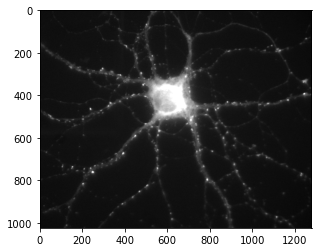

In [5]:
plt.imshow(image);

### 2.1.2 Image type

In [8]:
image

array([[32, 31, 31, ..., 18, 20, 22],
       [27, 24, 25, ..., 24, 24, 23],
       [26, 25, 25, ..., 17, 19, 20],
       ...,
       [25, 23, 24, ..., 19, 23, 23],
       [25, 25, 25, ..., 19, 18, 19],
       [26, 21, 23, ..., 19, 18, 22]], dtype=uint8)

In the output above we see that we have one additional piece of information: the array has ```dtype = uint8``` , which means that the image is of type *unsigned integer 8 bit*. We can also get the type of an array by using:

In [9]:
image.dtype

dtype('uint8')

Standard formats we are going to see are 8bit (uint8), 16bit (uint16) and non-integers (usually float64). The image type sets what values pixels can take. For example 8bit means values from $0$ to $2^8 -1= 256-1 = 255$. Just like for example in Fiji, one can change the type of the image. If we know we are going to do operations requiring non-integers we can turn the pixels into floats trough the ```.astype()``` method.

In [6]:
image_float = image.astype(np.float64)

In [7]:
image_float.dtype

dtype('float64')

The importance of the image type goes slightly against Python's philosophy of dynamics typing (no need to specify a type when creating a variable), but is a necessity when handling scientific images. We are going to see now what sort of operations we can do with arrays, and the importance of *types* is going to be more obvious.

## 2.2 Operations on arrays

### 2.2.1 Arithmetics on arrays

Numpy is written in a smart way such that it is able to handle operations between arrays of different sizes. In the simplest case, one can combine a scalar and an array, for example through an addition:

In [12]:
image+10

array([[42, 41, 41, ..., 28, 30, 32],
       [37, 34, 35, ..., 34, 34, 33],
       [36, 35, 35, ..., 27, 29, 30],
       ...,
       [35, 33, 34, ..., 29, 33, 33],
       [35, 35, 35, ..., 29, 28, 29],
       [36, 31, 33, ..., 29, 28, 32]], dtype=uint8)

Here Numpy automatically added the scalar 10 to **each** element of the array. Beyond the scalar case, operations between arrays of different sizes are also possible through a mechanism called broadcasting. This is an advanced (and sometimes confusing) features that we won't use in this course but about which you can read for example [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).

The only case we are going to consider here are operations between arrays of same size. For example we can multiply the image by itself. We use first the float version of the image:

In [8]:
image_sq = image_float*image_float

In [9]:
image_sq

array([[1024.,  961.,  961., ...,  324.,  400.,  484.],
       [ 729.,  576.,  625., ...,  576.,  576.,  529.],
       [ 676.,  625.,  625., ...,  289.,  361.,  400.],
       ...,
       [ 625.,  529.,  576., ...,  361.,  529.,  529.],
       [ 625.,  625.,  625., ...,  361.,  324.,  361.],
       [ 676.,  441.,  529., ...,  361.,  324.,  484.]])

In [10]:
image_float

array([[32., 31., 31., ..., 18., 20., 22.],
       [27., 24., 25., ..., 24., 24., 23.],
       [26., 25., 25., ..., 17., 19., 20.],
       ...,
       [25., 23., 24., ..., 19., 23., 23.],
       [25., 25., 25., ..., 19., 18., 19.],
       [26., 21., 23., ..., 19., 18., 22.]])

Looking at the first row we see $32^2 = 1024$ and $31^2=961$ etc. which means that the multiplication operation has happened **pixel-wise**. Note that this is **NOT** a classical matrix multiplication. We can also see that the output has the same size as the original arrays:

In [11]:
image_sq.shape

(1024, 1280)

In [12]:
image_float.shape

(1024, 1280)

Let's see now what happens when we square the original 8bit image:

In [13]:
image*image

array([[  0, 193, 193, ...,  68, 144, 228],
       [217,  64, 113, ...,  64,  64,  17],
       [164, 113, 113, ...,  33, 105, 144],
       ...,
       [113,  17,  64, ..., 105,  17,  17],
       [113, 113, 113, ..., 105,  68, 105],
       [164, 185,  17, ..., 105,  68, 228]], dtype=uint8)

We see that we don't get at all the expected result. Since we multiplied two 8bit images, Numpy assumes we want an 8bit output. And therefore the values are bound between 0-255. For example the second value of the first row is just the remainder of the modulo 256:

In [14]:
961%256

193

The same thing happens e.g. if we add an integer scalar to the matrix. We can also visualize the result:

In [22]:
print(image+230)

[[  6   5   5 ... 248 250 252]
 [  1 254 255 ... 254 254 253]
 [  0 255 255 ... 247 249 250]
 ...
 [255 253 254 ... 249 253 253]
 [255 255 255 ... 249 248 249]
 [  0 251 253 ... 249 248 252]]


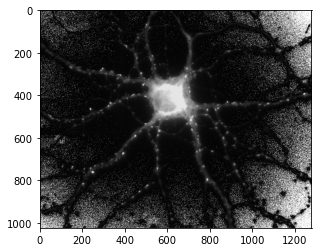

In [23]:
plt.imshow(image+230)

Clearly something went wrong as we get values that are smaller than 230. The image also has a strange aspect, with dark regions suddenly brighter. Again any value **over-flowing** above 255 restarts at 0.

This problem can be alleviated in different ways. For example we can combine a integer array with a float scalar and Numpy will automatically give a result using the "most complex" type:

In [16]:
image_plus_float = image+230.0

In [17]:
print(image_plus_float)

[[262. 261. 261. ... 248. 250. 252.]
 [257. 254. 255. ... 254. 254. 253.]
 [256. 255. 255. ... 247. 249. 250.]
 ...
 [255. 253. 254. ... 249. 253. 253.]
 [255. 255. 255. ... 249. 248. 249.]
 [256. 251. 253. ... 249. 248. 252.]]


To be on the safe side we can also explicitely change the type when we know we might run into this kind of trouble. This can be done via the ```.astype()``` method: 

In [18]:
image_float = image.astype(float)

In [19]:
image_float.dtype

dtype('float64')

Again, if we combine floats and integers the output is going to be a float: 

In [20]:
image_float+230

array([[262., 261., 261., ..., 248., 250., 252.],
       [257., 254., 255., ..., 254., 254., 253.],
       [256., 255., 255., ..., 247., 249., 250.],
       ...,
       [255., 253., 254., ..., 249., 253., 253.],
       [255., 255., 255., ..., 249., 248., 249.],
       [256., 251., 253., ..., 249., 248., 252.]])

It is a very common error to use the wrong image type for a certain application. When you do series of operations, it's always a good idea to regularly look at the image itself to catch such problems that remain "silent" (no error message).

### 2.2.2 Logical operations

A set of important operations when processing images are logical (or boolean) operations that allow e.g. to create object masks. Those have a very simple syntax in Numpy. For example, let's compare pixel intensities to some value ```threshold```:

In [24]:
threshold = 100

In [25]:
image > threshold

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We see that the result is again a pixel-wise comparison with ```threshold```, generating in the end a boolean or logical matrix. We can directly assign this logical matrix to a variable and verify its shape and type and plot it:

In [26]:
image_threshold = image > threshold

In [27]:
image_threshold.shape

(1024, 1280)

In [28]:
image_threshold.dtype

dtype('bool')

In [29]:
image_threshold

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

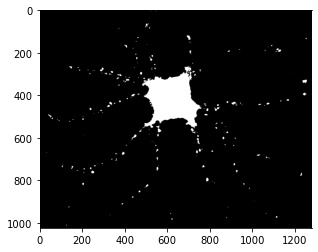

In [30]:
plt.imshow(image_threshold);

Of course other logical operator can be used (<, >, ==, !=) and the resulting boolean matrices combined:

In [31]:
threshold1 = 70
threshold2 = 100
image_threshold1 = image > threshold1
image_threshold2 = image < threshold2

In [32]:
image_AND = image_threshold1 & image_threshold2
image_XOR = image_threshold1 ^ image_threshold2

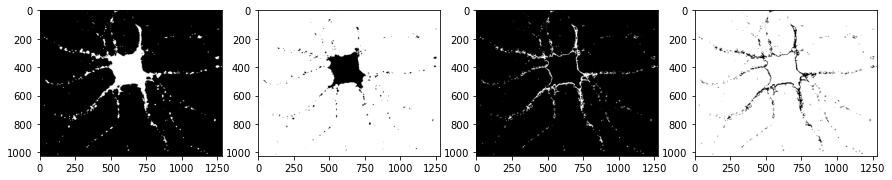

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,15))
ax[0].imshow(image_threshold1)
ax[1].imshow(image_threshold2)
ax[2].imshow(image_AND)
ax[3].imshow(image_XOR);

## 2.3 Numpy functions

To broadly summarize, one can say that Numpy offers four types of operations: 1. Creation of various types of arrays, 2. Pixel-wise modifications of arrays, 3. Operations changing array dimensions, 4. Combinations of arrays.

### 2.3.1 Array creation

Often we are going to create new arrays that later transform them. Functions creating arrays usually take arguments specifying both the content of the array and its dimensions. 

Some of the most useful functions create 1D arrays of ordered values. For example to create a sequence of numbers separated by a given step size:

In [36]:
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Or to create an array with a given number of equidistant values:

In [37]:
np.linspace(0,20,5)

array([ 0.,  5., 10., 15., 20.])

In higher dimensions, the simplest example is the creation of arrays full of ones or zeros. In that case one only has to specify the dimensions. For example to create a 3x5 array of zeros:

In [38]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Same for an array filled with ones:

In [39]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Until now we have only created one-dimensional lists of 2D arrays. However Numpy is designed to work with arrays of arbitrary dimensions. For example we can easily create a three-dimensional "ones-array" of dimension 5x8x4:

In [40]:
array3D = np.ones((2,6,5))

In [41]:
array3D

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [42]:
array3D.shape

(2, 6, 5)

And all operations that we have seen until now and the following ones apply to such high-dimensional arrays exactly in the same way as before:

In [43]:
array3D*5

array([[[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]],

       [[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]]])

We can also create more complex arrays. For example an array filled with numbers drawn from a normal distribution:

In [44]:
np.random.standard_normal((3,5))

array([[-1.38184893,  0.33430238, -1.42013088, -1.12804266, -1.58742111],
       [ 0.44614973,  1.61777698,  0.97887903, -0.23182128, -0.02835075],
       [ 1.25203974, -0.50650336,  0.07177741,  1.86019164, -0.73981508]])

As mentioned before, some array-creating functions take additional arguments. For example we can draw samples from a gaussian distribution whose mean and variance we can specify. 

In [45]:
np.random.normal(loc=10, scale=2, (5,2))

array([[ 9.11799409,  9.75363107],
       [11.44167846,  6.6079535 ],
       [16.62939167,  9.30917609],
       [11.17191225, 12.73997761],
       [11.12666472,  8.87907005]])

### 2.3.2 Pixel-wise operations

Numpy has a large trove of functions to do all common mathematical operations matrix-wise. For example you can take the cosine of all elements of your array:

In [34]:
angles = np.random.random_sample(5)
angles

array([0.65976974, 0.99439279, 0.03679191, 0.50887354, 0.29399319])

In [47]:
np.cos(angles)

array([0.64349608, 0.88449761, 0.78071724, 0.98767463, 0.61858414])

Or to calculate exponential values:

In [48]:
np.exp(angles)

array([2.39106632, 1.62479272, 1.96400065, 1.17019129, 2.46910788])

And many many more. If you need any specific one, look for it in the docs or just Google it.

### 2.2.3 Operations changing dimensions

Some functions are accessible in the form of *methods*, i.e. they are called using the *dot-notation*. For example to find the maximum in an array:

In [35]:
angles.max()

0.9943927890376215

Alternatively there's also a maximum function:

In [36]:
np.max(angles)

0.9943927890376215

The ```max``` function like many others (min, mean, median etc.) can also be applied to a given axis. Let's imagine we have an image of dimensions 10x10x4 (e.g. 10 pixels high, 10 pixels wide and 4 planes):

In [37]:
volume = np.random.random((10,10,4))

If we want to do a maximum projection along the third axis, we can specify (remember that we start counting at 0 in Python). We expect to get a single 10x10px image out of this:

In [40]:
projection = np.max(volume, axis = 2)

In [41]:
projection.shape

(10, 10)

We see that we have indeed a new array with one dimension less because of the projection.

### 2.3.4 Combination of arrays

Finally arrays can be combined in multiple ways. For example if we want to assemble two images with the same size into a stack, we can use the ```np.stack``` function:

In [42]:
image1 = np.ones((4,4))
image2 = np.zeros((4,4))

stack = np.stack([image1, image2],axis = 2)

In [43]:
stack.shape

(4, 4, 2)

## 2.3 Slicing and indexing

Just like broadcasting, the selection of parts of arrays by slicing or indexing can become very sophisticated. We present here only the very basics to avoid confusion. There are often multiple ways to do slicing/indexing and we favor here easier to understand but sometimes less efficient solutions.

Let's look at a painting:

In [47]:
image = skimage.io.imread('../Data/Klee.jpg')

In [48]:
image.shape

(643, 471, 3)

We see that the image has three dimensions, probably it's a stack of three images of size 643x471. Let us try to have a look at this image hoping that dimensions are handled gracefully:

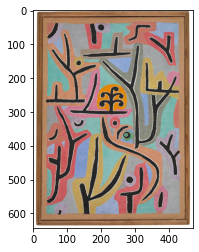

In [49]:
plt.imshow(image);

Whenever an image has three planes in its third dimension like here, matplotlib assumes that it is dealing with a natural image where planes encode the colors Red, Green and Blue (RGB) and displays it accordingly.

### 2.3.1 Array slicing

Let us now just look at one of the three planes composing the image. To do that, we are going the select a portion of the image array by slicing it. For each dimension we can:
- give a single index e.g. ```0``` to recover the first element
- give a range e.g. ```0:10``` to recover the first 10 elements
- recover **all** elements using the sign ```:```

In our particular case, we want to select all rows ```:``` for the first axis, all columns ```:``` for the second axis, and a single plane ```1``` for the third axis of the image:

In [51]:
image[:,:,1].shape

(643, 471)

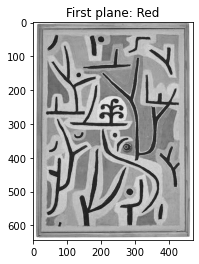

In [52]:
plt.imshow(image[:,:,0],cmap='gray')
plt.title('First plane: Red');

We see now the red layer of the image, and indeed the bright regions in this gray scale image correspond with red regions. We can do the same for the others by specifying planes 0, 1, and 2:

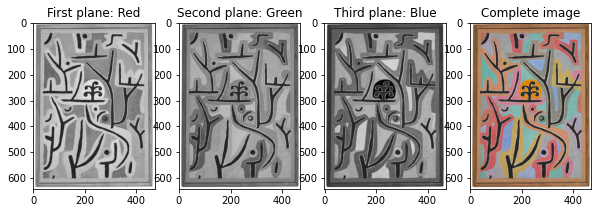

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
ax[0].imshow(image[:,:,0],cmap='gray')
ax[0].set_title('First plane: Red')
ax[1].imshow(image[:,:,1],cmap='gray')
ax[1].set_title('Second plane: Green')
ax[2].imshow(image[:,:,2],cmap='gray')
ax[2].set_title('Third plane: Blue');
ax[3].imshow(image)
ax[3].set_title('Complete image');

Logically intensities are high for the red channel and low for the blue channel as the image has more red/orange/brown patterns. We can confirm that by measuring the mean of each plane. To do that we use the same function as above but apply it to a single sliced plane:

In [54]:
image0 = image[:,:,0]

In [55]:
np.mean(image0)

156.64744612072525

For all planes, we can either use a comprehension list to go through all planes:

In [59]:
[np.mean(image[:,:,i]) for i in range(3)]

[156.64744612072525, 133.98373138123117, 120.4321271375882]

Or more elegantly, calculate the mean over the axis 0 and 1:

In [60]:
np.mean(image,axis = (0,1))

array([156.64744612, 133.98373138, 120.43212714])

To look at some more details let us focus on a smaller portion of the image e.g. the "plant" in the middle of the image. For that we are going to take a slice of the red image and store it in a new variable and display the selection. We consider pixel rows from 200 to 300 and columns from 180 to 300 of the first plane (0).

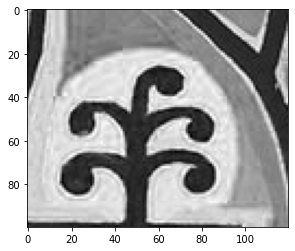

In [61]:
image_red = image[200:300,180:300,0]
plt.imshow(image_red,cmap='gray');

There are different ways to select parts of an array. For example one can select every n'th element by giving a step size. In the case of an image, this subsamples the data:

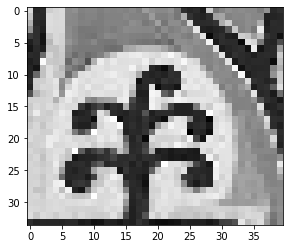

In [62]:
image_subsample = image[200:300:3,180:300:3,0]
plt.imshow(image_subsample,cmap='gray');

### 2.3.2 Array indexing

In addition to slicing an array, we can also select specific values out of it. There are [many](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) different ways to achieve that, but we focus here on two main ones.

First, one might have a list of pixel positions and one wishes to get the values of those pixels. By passing two lists of the same size containing the rows and columns positions of those pixels, one can recover them:

In [63]:
row_position = [0,1,2,3]
col_position = [0,1,0,1]

print(image_red[0:5,0:5])

image_red[row_position,col_position]

[[218 174  58  41  43]
 [190 115  35  45  41]
 [189  87  29  46  39]
 [200  95  37  45  41]
 [184  89  36  44  46]]


array([218, 115, 189,  95], dtype=uint8)

Alternatively, one can pass a logical array of the same dimensions as the original array, and only the ```True```
 pixels are selected. For example, let us create a logical array by picking values below a threshold:

In [64]:
threshold_image = image_red<120

Let's visualize it. Matplotlib handles logical arrays simply as a binary image:

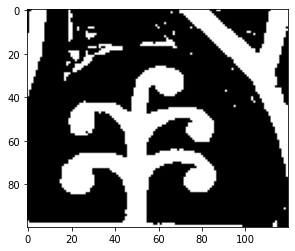

In [65]:
plt.imshow(threshold_image)

We can recover the value of all the "white" (True) pixels in the original image by **indexing one array with the other**:

In [66]:
selected_pixels = image_red[threshold_image]
print(selected_pixels)

[ 58  41  43 ...  94 116 111]


And now ask how many pixels are above threshold and what their average value is.

In [67]:
len(selected_pixels)

3603

In [68]:
np.mean(selected_pixels)

48.86511240632806

We now know that there are 3603 pixels above the threshold and that their mean is 48.9.